**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [23]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [24]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [25]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [47]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


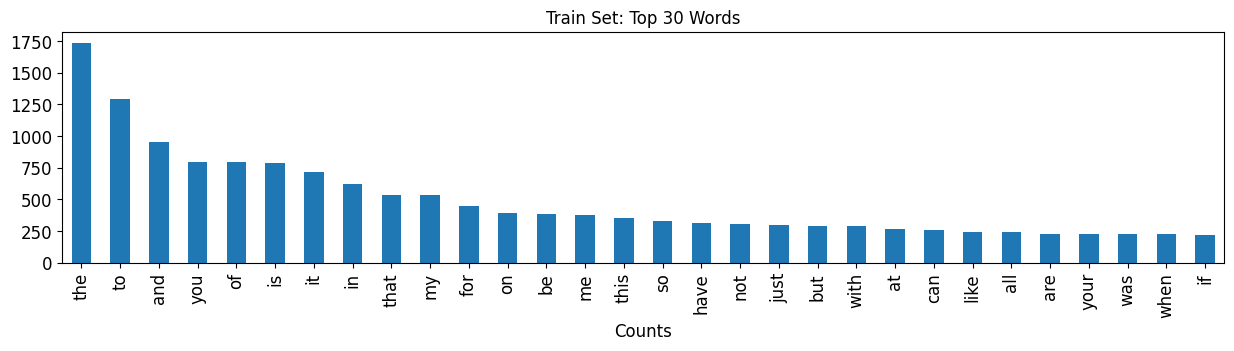

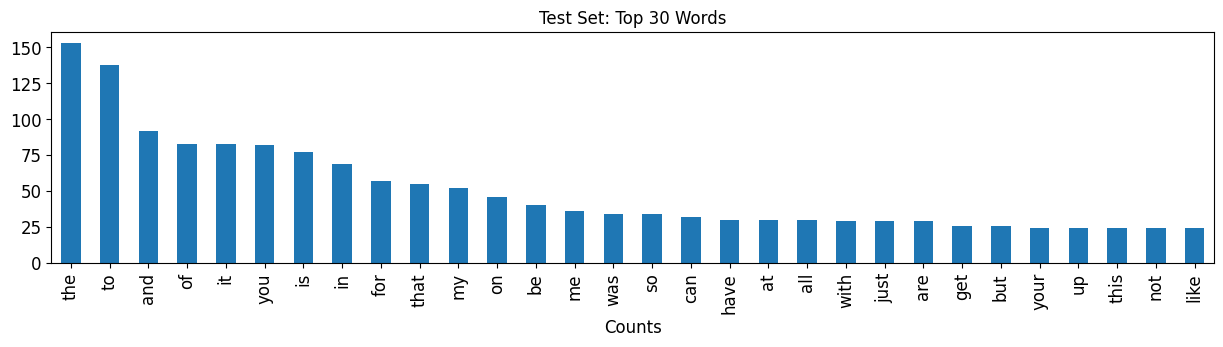

In [56]:
# Exercise 11 & 5.4.1 Transform Text Data
# Answer here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def top_words(df_text, title, topn=30):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df_text) #learn the vocabulary and return document-term matrix
    n_docs, n_terms = X_counts.shape # n_docs = number of documents, n_terms = number of terms
    # Get the vocabulary
    terms = np.array(count_vect.get_feature_names_out())
    term_counts = np.asarray(X_counts.sum(axis=0)).ravel()
    order = np.lexsort((np.arange(0,n_terms), term_counts))[::-1]   # np.lexsort((a,b)): b 先排序，然後 a 按照 b 的順序排序後回傳索引值

    df_terms = pd.DataFrame({
    "term": terms,
    "count": term_counts
    })
    df_terms['index'] = df_terms.index
    df_terms.index = terms
    df_terms_sort = df_terms.iloc[order]
    plot = df_terms_sort.head(topn)['count'].plot(kind = 'bar', title = title, fontsize = 12, figsize = (15,3)) 
    plot.set_xlabel("Counts", fontsize=12)
    plt.show()

top_words(train_df.text, title = "Train Set: Top 30 Words", topn=30)
top_words(test_df.text, title = "Test Set: Top 30 Words", topn=30)

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [11]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [12]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [13]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

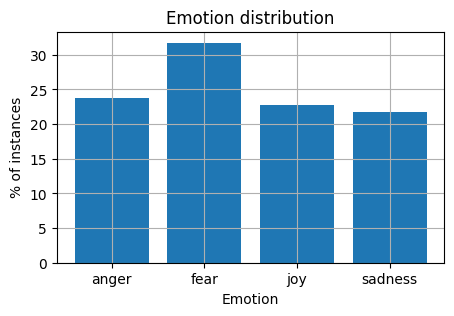

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [59]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [60]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [61]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [62]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [64]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [65]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [66]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\chenw\anaconda3\envs\dm2025\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [67]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [69]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].

In [77]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Build analyzers (TF-IDF)
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
# (Optional) remove common stopwords (This changes result but I think it is more useful.)
# TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize, lowercase=True, stop_words='english')

# Apply analyzer to training data
TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

## Check dimension
train_data_TFIDF_features_1000.shape

# Observe some feature names
feature_names = TFIDF_1000.get_feature_names_out()
print(f"Features [100:110]: {feature_names[100:110]}")

Features [100:110]: ['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [84]:
print(type(X_train), X_train.shape)
print(type(y_train), len(y_train))

<class 'scipy.sparse._csr.csr_matrix'> (3613, 500)
<class 'pandas.core.series.Series'> 3613


In [86]:
## Build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## Training!
DT_model = DT_model.fit(X_train, y_train)

## Predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## So we get the pred result
y_test_pred[:10]

array(['sadness', 'fear', 'anger', 'joy', 'sadness', 'fear', 'joy', 'joy',
       'joy', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [87]:
## accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report ## precision, recall, f1-score,

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print("\nClassification Report:\n", classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.99
testing accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [95]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = cm_tree = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [96]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', fmt = 'd',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = fmt
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

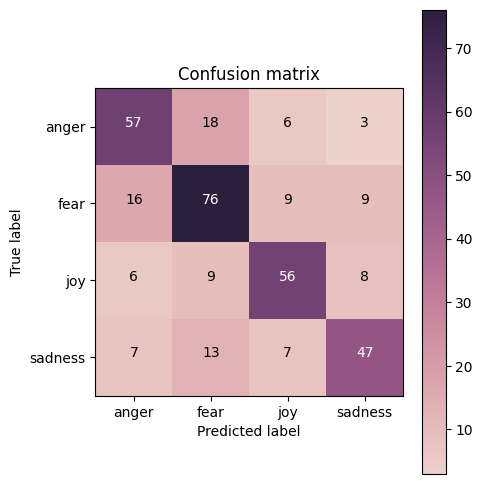

In [97]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

% Answer here

I also draw the confusion matrix with normalization. So that it we obtain more information.

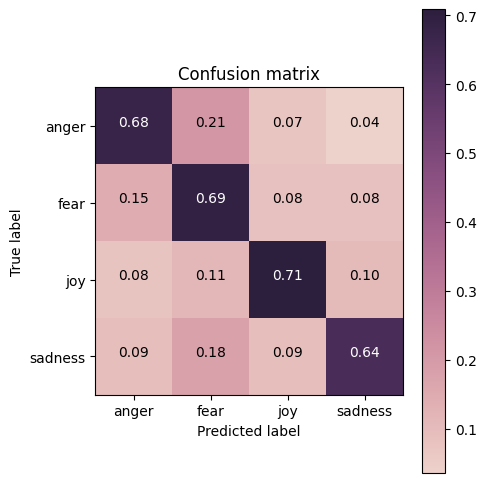

In [98]:
cm_tree_normalize = confusion_matrix(y_true=y_test, y_pred=y_test_pred, normalize='true') 
plot_confusion_matrix(cm_tree_normalize, classes=my_tags, title='Confusion matrix', fmt = '.2f')

For the accuracy table: 
Observe that the model is overfit, the training accuracy is 0.99 but the test accuracy is only 0.68. 

For the confusion table:
1. 'anger' is most confused with fear (17 misclassified).
2. 'fear' is most confused with  anger (14 misclassified) and sadness (12 misclassified), bus still has the highest correct predictions either in number or probability.
3. 'joy' is most confused with 'fear' and 'sadness' (9 misclassified). It is imaginable that for example one might cry becaused of sadness or fear, but sometimes one might cry becuse of joy.
4. 'sadness' is most confused with 'fear' (12 misclassified) and has the weakest correct predictions either in number (43 correct) or probability (0.58 accuracy).

The more the confusion, the more we might have shared words between these feeling. The reason for the confusion in above may due to that sometime feelings appear together as a mixed or complex feelings, so same adjective or word may not totally/distinctly represent one feeling.

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
training accuracy: 0.79
testing accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



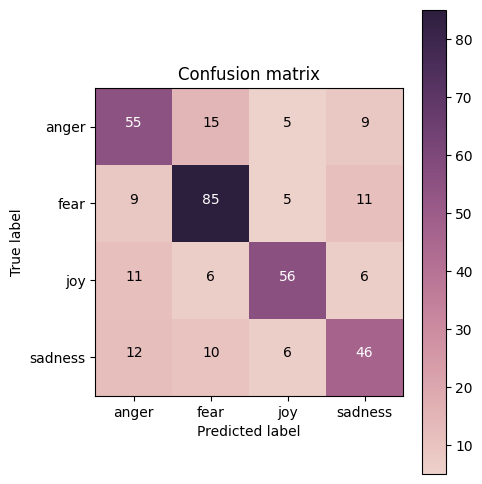

In [105]:
# Answer here (The explain is below)
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# For a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## Take a look at data dimension is a good habit :) (Yeah XD)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

# Build the Naive Bayes model
nb_classifier = MultinomialNB() 
nb_classifier.fit(X_train, y_train) # Train
y_train_pred = nb_classifier.predict(X_train) # Predict on train
y_test_pred = nb_classifier.predict(X_test) # Predict on test

# Evaluate the classifier
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print("\nClassification Report:\n", classification_report(y_true=y_test, y_pred=y_test_pred))

# Plot your confusion matrix
cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_nb, classes=my_tags, title='Confusion matrix')

For the naive Bayes classifier
- Accuracy = 0.79 on training and 0.7 on testing which is performance between moderate to good — the model captures general emotional tone but confuses overlapping emotions.
- Accuracy gap between train and test is smaller than decision tree, meaning that it is more generalizable, less overfit.
- Average precision which tells us how many predicted labels were correct is ≈ 0.695. Meaning that it is fairly balanced across classes, suggesting no extreme bias.                                         
- Recall which tells us how many true labels were correctly found is avg ≈ 0.689 and All emotions have recall between 0.62–0.77, it is a reasonable detection ability.                          
- Macro F1-score tells us balance between precision and recall it is ≈ 0.692 indicates decent overall trade-off.                                       

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

| Model             | Training Accuracy | Testing Accuracy | Macro F1 | Key Behavior                                                 |
| :---------------- | :---------------: | :--------------: | :------: | :----------------------------------------------------------- |
| **Decision Tree** |      **0.99**     |     **0.65**     | **0.65** | Overfitting — memorizes training data but generalizes poorly |
| **Naive Bayes**   |      **0.79**     |     **0.70**     | **0.69** | Good generalization — stable between train/test              |

Decision Tree is high training but also high variance, flexible but sensitive to noise, lower testing accuracy. 
- The theoretical cause might be that a decision tree recursively splits data to minimize impurity (e.g., Gini or entropy). It can fit every detail in training data, especially in high-dimensional sparse text (like BOW/TF-IDF).
- However, it learns specific words or combinations unique to training samples (“overfitting”). Generalization suffers — the tree only memorizes.
- Text features are extremely high-dimensional but mostly 0s (sparse). Decision Trees don’t handle this well because each word acts as a nearly unique feature.

Naive Bayes is lower training accuracy but also low variance, less flexible but robust, higher test accuracy.
- Naive Bayes assumes all features (words) are conditionally independent given the class. This is a strong simplifying assumption, but surprisingly effective in text classification.
- It focuses on overall word distributions rather than specific patterns.
- Thus, it cannot perfectly fit training data (hence lower training accuracy). But that simplicity gives strong generalization to unseen data.
- Words are approximately independent given an emotion class, so the assumption works reasonably well.

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering) e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


In [88]:
# RUN THIS IF DONT WANT TO FIND BOW_500
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\chenw\anaconda3\envs\dm2025\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [42]:
import sys; print(sys.executable)

C:\Users\chenw\anaconda3\envs\dm2025\python.exe


In [54]:
from tensorflow import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [44]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4095 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [55]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 100       anger
1239       fear
1368       fear
3329    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [56]:
from tensorflow import keras

In [57]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [58]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [59]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [60]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.3734 - loss: 1.3203 - val_accuracy: 0.4611 - val_loss: 1.2694
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6521 - loss: 0.9776 - val_accuracy: 0.6686 - val_loss: 0.9161
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7974 - loss: 0.5738 - val_accuracy: 0.6916 - val_loss: 0.7950
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8400 - loss: 0.4188 - val_accuracy: 0.7061 - val_loss: 0.8003
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8793 - loss: 0.3359 - val_accuracy: 0.7032 - val_loss: 0.8272
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9034 - loss: 0.2757 - val_accuracy: 0.6628 - val_loss: 0.9045
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9233 - loss: 0.2316 - val_accuracy: 0.6772 - val_loss: 0.9332
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9372 - loss: 0.1937 - val_accu

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [61]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


array([[7.1473134e-04, 9.9898034e-01, 8.0083391e-06, 2.9693206e-04],
       [9.7711811e-05, 6.0269326e-01, 1.1397478e-01, 2.8323421e-01],
       [7.2273292e-02, 6.5860558e-01, 1.1741681e-01, 1.5170436e-01],
       [1.0932925e-03, 2.0256317e-03, 9.7075969e-01, 2.6121523e-02],
       [1.7901786e-05, 9.9998164e-01, 5.2990455e-08, 3.5448588e-07]],
      dtype=float32)

In [62]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'fear', 'joy', 'fear'], dtype=object)

In [63]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [64]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.373374,1.320289,0.461095,1.269443
1,1,0.652090,0.977599,0.668588,0.916140
2,2,0.797398,0.573806,0.691643,0.795025
3,3,0.840022,0.418792,0.706052,0.800314
4,4,0.879325,0.335938,0.703170,0.827154
5,5,0.903404,0.275654,0.662824,0.904518
6,6,0.923332,0.231560,0.677233,0.933248
7,7,0.937171,0.193663,0.680115,1.010825
8,8,0.946859,0.169095,0.665706,1.037852
9,9,0.951564,0.153968,0.677233,1.090371


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)

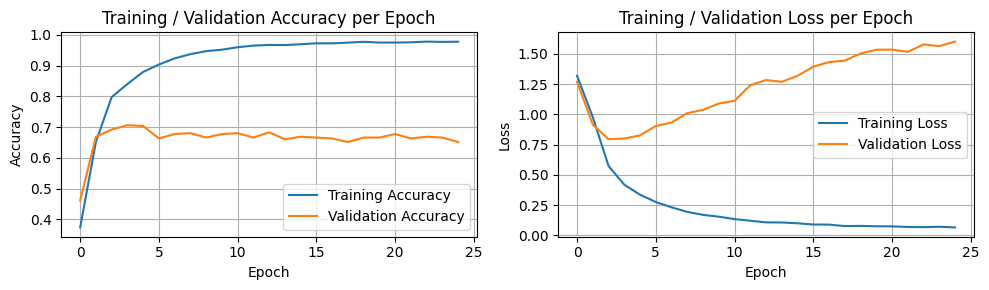

In [75]:
# Answer here
import matplotlib.pyplot as plt
'''
# Accuracy plot
plt.figure(figsize=(5,3))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
'''
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Accuracy subplot
axes[0].plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
axes[0].plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Training / Validation Accuracy per Epoch')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Loss subplot
axes[1].plot(training_log['epoch'], training_log['loss'], label='Training Loss')
axes[1].plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
axes[1].set_title('Training / Validation Loss per Epoch')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Observation toward accuracy plot per epoch:
| Result                  | Trend over Incresing Epoch                                        |
| :---------------------- | :---------------------------------------------------------------- |
| **Training Accuracy**   | rises steadily (0.37 → 0.97)                                      |
| **Validation Accuracy** | rises early → then reach plateaus with small fluctuations (~0.68) |

Observation toward loss plot per epoch:
| Result                  | Trend over Incresing Epoch                                        |
| :---------------------- | :---------------------------------------------------------------- |
| **Training Loss**       | decreasessteadily                                                 |
| **Validation Loss**     | decreases early → then rises                                      |

Training accuracy keeps improve while the validation reach its limit.
Training loss keeps drop while the validation not only stop but rises as epoch increase.
These two is actually two perspective of a same classic sign of overfitting:
the model is memorizing patterns in the training data rather than learning generalizable features.

If both accuracies were low and both losses high. That would indicate underfitting, meaning the model is too simple or insufficiently trained.

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [112]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')
# if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1476,20619,An @amityaffliction kind of drive home from wo...,"[An, @, amityaffliction, kind, of, drive, home..."
891,20034,"Im not a #nervouswreck, Im a #pileup. #GoingC...","[Im, not, a, #, nervouswreck, ,, Im, a, #, pil..."
3151,40324,@narcissusheiyan maybe it'd have been differe...,"[@, narcissusheiyan, maybe, it, 'd, have, been..."
1518,20661,@Avanquest i have unsubscribed 3 times from yo...,"[@, Avanquest, i, have, unsubscribed, 3, times..."
2936,40109,one ep of despair arc made me happy but and th...,"[one, ep, of, despair, arc, made, me, happy, b..."


In [113]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['An', '@', 'amityaffliction', 'kind', 'of', 'drive', 'home', 'from', 'work', 'today', '#', 'dailyfeels']),
       list(['Im', 'not', 'a', '#', 'nervouswreck', ',', 'Im', 'a', '#', 'pileup', '.', '#', 'GoingCrazy', '#', 'HelpMe', '#', 'Insane', '#', 'Antisocial']),
       list(['@', 'narcissusheiyan', 'maybe', 'it', "'d", 'have', 'been', 'different', 'if', 'I', 'stayed', 'for', 'sixth', 'form', '?', 'But', 'still', ',', 'the', 'oppressive', 'architecture', ',', 'uninteresting', 'people'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [114]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

In [26]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [20]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.560642  ,  0.5148048 ,  0.0689007 ,  0.44961086, -0.23017365,
       -0.87687427,  0.6329779 ,  1.3369408 , -0.46045995, -0.20868564,
       -0.52337945, -0.5661799 , -0.6490906 ,  0.39474356, -0.15493926,
       -0.28910217,  0.5454864 , -0.4251969 ,  0.12056896, -1.099601  ,
        0.6396851 ,  1.0146174 ,  0.46298447, -0.3903126 ,  0.1730067 ,
        0.585641  , -0.5112812 ,  0.29767156, -0.31137168,  0.2957075 ,
        0.10306615,  0.07038603,  0.47231403, -0.63582164, -0.05333869,
        0.5693715 ,  0.22469969, -0.03577199, -0.59206045, -0.29449654,
        0.27557585, -0.5175113 , -0.12942752,  0.17882401,  0.37097245,
       -0.3107428 , -0.70882875, -0.18402503,  0.5941889 , -0.0013652 ,
       -0.0391352 , -0.27846348, -0.17805842,  0.21334039, -0.788217  ,
        0.31178707, -0.07714514, -0.17368941, -0.33304113, -0.14028515,
        0.28915825, -0.40104386,  0.57688695,  0.52857   , -0.45743537,
        0.7567369 ,  0.46587756,  0.5696279 , -1.2192868 ,  0.73

In [21]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9275897741317749),
 ('birthday', 0.918724536895752),
 ('help', 0.916033148765564),
 ('polite', 0.9098090529441833),
 ('right', 0.9083901643753052),
 ('cry', 0.9071671366691589),
 ('🕋', 0.9018415808677673),
 ('melancholic', 0.8992305397987366),
 ('depress', 0.8991169929504395),
 ('Makes', 0.8984665870666504)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained word2vec model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [116]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...

model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [25]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

% Answer here

- **Average:** We can add up all the obtained embeddings that correspond to the words in the sentence and take average, and use this average to represent the sentence.
- **Weighted average:** We can add up the obtained embeddings that correspond to the words in the sentence while weighted them with importance metric 一 for example use TF–IDF which highlights unique, informative words for that sentence. And use this weighted average result to represent the sentence.
- **Advanced model:** Maybe use these embeddings as the first step input and train a deep model to get a function that can generate vector that represent the document. (But, need to think more.)

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [27]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [28]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [29]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [30]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [117]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

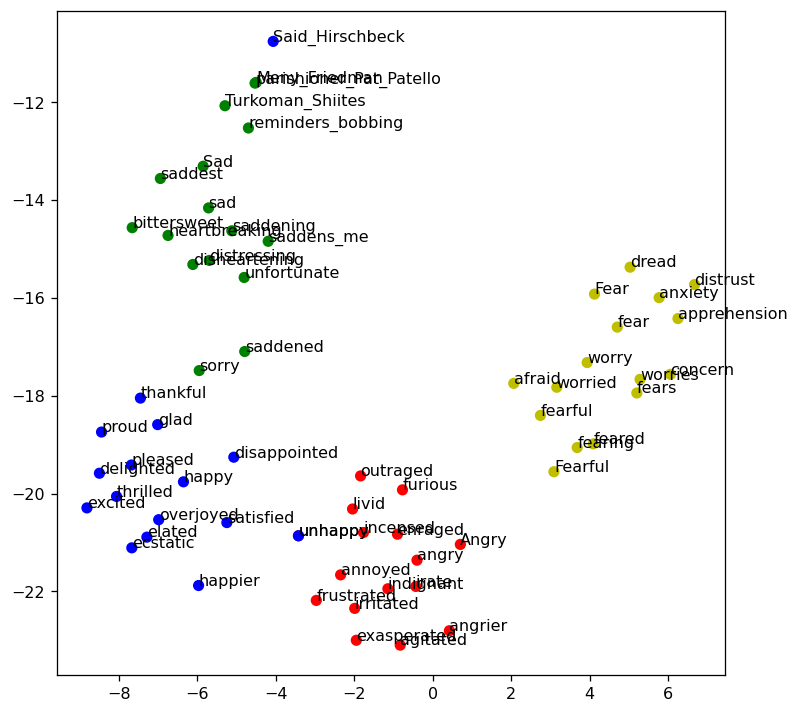

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

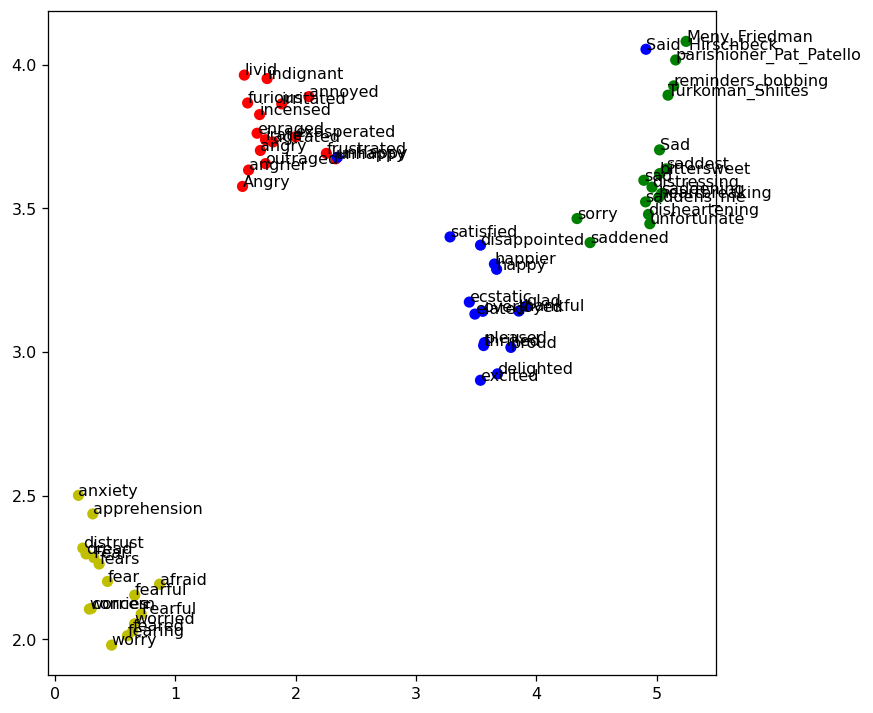

In [129]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [136]:
# Answer here

In [130]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

## w2v model
model = w2v_google_model

# target emotion words
core_words = ['angry', 'happy', 'sad', 'fear'] # word_list
topn = 15

# Collect related words
word_groups = {}
for w in core_words:
    sim_words = [w] + [word_ for word_, sim_ in model.most_similar(w, topn=topn)]
    word_groups[w] = sim_words

print('angry words: ', word_groups['angry'], 'total ', len(word_groups['angry']), 'words')
print('happy words: ', word_groups['happy'], 'total ', len(word_groups['happy']), 'words')
print('sad words: ', word_groups['sad'], 'total ', len(word_groups['sad']), 'words')
print('fear words: ', word_groups['fear'], 'total ', len(word_groups['fear']), 'words')

target_words = sum(word_groups.values(), [])
print(f"Total target words: {len(target_words)}")
# Notice that we have 1 core word + 15 selected words = 16 words for each word group

# assign a distinct color per emotion
colors_map = {'angry': 'r', 'happy': 'b', 'sad': 'g', 'fear': 'y'}
color = []
for w in core_words:
    color += [colors_map[w]] * (topn + 1)

angry words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry'] total  16 words
happy words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy'] total  16 words
sad words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet'] total  16 words
fear words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful'] total  16 words
Total target words: 64


In [133]:
## prepare training word vectors
size = 200 # add 200 random background words for context!?
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

In [134]:
# t-SNE
tsne = TSNE(n_components=2, metric='cosine', random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_train)

# UMAP
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=42)
X_umap = umap_model.fit_transform(X_train)

9 [0.93108821 0.64433148]
31 [-0.63815462 -0.60919686]


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


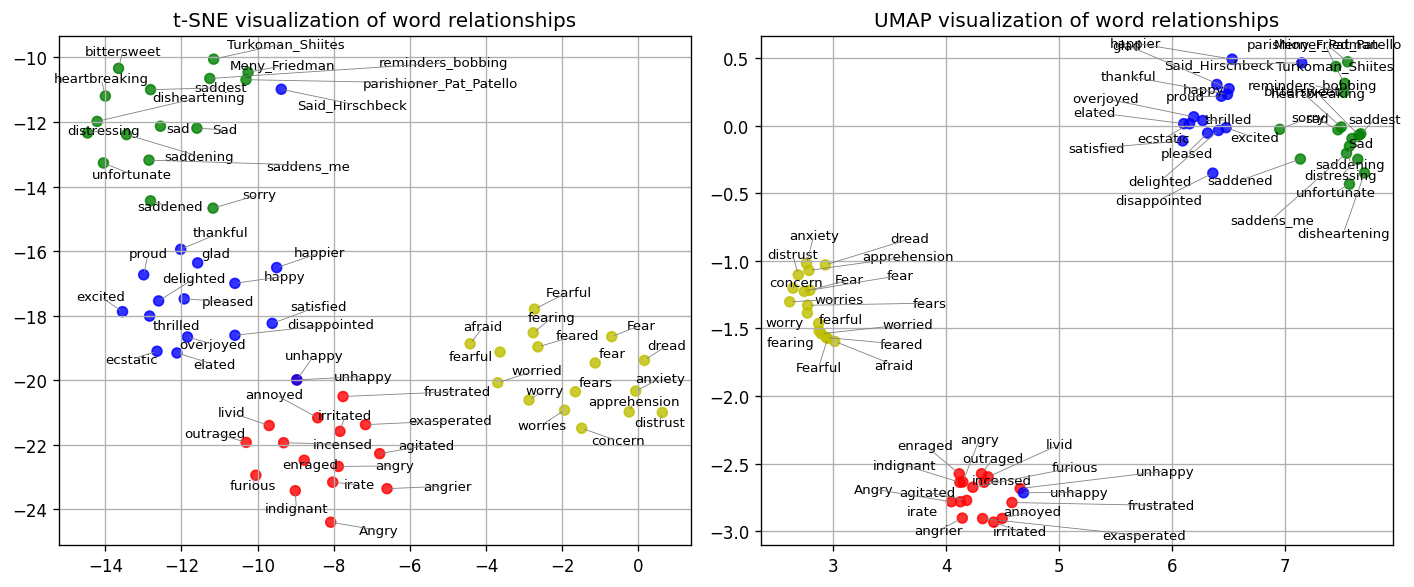

In [135]:
from adjustText import adjust_text

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=120)

# t-SNE
axes[0].scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color, s=35, alpha=0.8)
texts_tsne = []
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    texts_tsne.append(axes[0].text(x, y, label, fontsize=8))
axes[0].set_title("t-SNE visualization of word relationships")
axes[0].grid(True)
# Adjust text to prevent overlap
adjust_text(texts_tsne, ax=axes[0],
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
            force_points=0.2, force_text=0.3, expand_points=(1.2, 1.4))

# UMAP
axes[1].scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color, s=35, alpha=0.8)
texts_umap = []
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    texts_umap.append(axes[1].text(x, y, label, fontsize=8))
axes[1].set_title("UMAP visualization of word relationships")
axes[1].grid(True)
# Adjust text to prevent overlap
adjust_text(texts_umap, ax=axes[1],
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
            force_points=0.2, force_text=0.3, expand_points=(1.2, 1.4))

plt.tight_layout()
plt.show()

Similar characteristics: 
- Both t-SNE and UMAP produce four clearly separable clusters, each corresponding to a distinct emotion category. Even without color labels, one can visually distinguish these clusters.

t-SNE characteristics: 
- Each cluster is well separated but more diffuse (points are more scattered).
- The distances between clusters should not be interpreted — t-SNE is designed mainly for local neighborhood preservation and visualization, not global distance fidelity.
- There is a clear outlier of happy group, 'Said_Hirschbeck', it falls into sad group.

UMAP characteristics:
- Clusters are tighter and more compact than in t-SNE. The reason may be that UMAP emphasizes both local and some global structure, which can make boundaries sharper and clusters more discrete than in t-SNE.
- Angry and unhappy are positioned close but distinct.
- There is a outlier of happy group, 'Said_Hirschbeck' that also falls into sad group but its distance to center of happy group is not significantlly different compare with other points.

Special observation about word “unhappy”: The word “unhappy” appears in both the angry and happy groups.
- In the UMAP plot, “unhappy” is mapped entirely within the angry cluster, appearing twice with different color labels.
- In the t-SNE plot, “unhappy” lies between the angry and happy clusters, reflecting its semantic overlap between the two emotions.

In conclusion, the discrepancy arises because t-SNE emphasizes local pairwise similarities while preserving local neighborhoods, whereas UMAP also seeks to preserve global structure through a different manifold assumption and density weighting. As a result, UMAP can sometimes merge semantically ambiguous points (like “unhappy”) more decisively into one nearby cluster.

---